# **Project Title: Brain Tumor Classification (MRI)**


## **Introduction**
The goal of this project is to perform supervised classification on brain tumor dataset using MRI images. The chosen dataset is organized into classes such as glioma_tumor, meningioma_tumor, no_tumor, and pituitary_tumor. The project involves building a classification model and incorporating feature visualization techniques.


## **1. Dataset Selection**

In the initial phase of the project, the critical task was to carefully select an appropriate dataset for supervised classification. The chosen dataset plays a pivotal role in the success of the entire project, as it forms the foundation upon which the classification model is built. The following details provide insight into the dataset selection process:


### **1.1 Dataset Type:**

For this project, we opted for a medical imaging dataset focused on brain tumor classification using Magnetic Resonance Imaging (MRI). The dataset, obtained from Kaggle, contains labeled examples of brain tumor images. The choice of a medical imaging dataset aligns with the project's objective of leveraging deep learning techniques for healthcare applications.

### **1.2 Rationale for Choosing Brain Tumor Dataset:**

Brain tumors are a significant health concern, and the ability to accurately classify them through automated means has immense practical implications. MRI is a widely used diagnostic tool in healthcare, making the dataset relevant and impactful. The project aims to contribute to the field of medical image analysis, which involves intricate patterns and features, challenging the classification model.

### **1.3 Dataset Characteristics:**

The dataset consists of MRI scans categorized into different types of brain tumors, including glioma tumor, meningioma tumor, and pituitary tumor. Each category is represented by labeled folders containing JPG images. The multi-class nature of the dataset offers a diverse set of challenges for the classification model.

### **1.4 Dataset Complexity:**

The complexity of the dataset is high due to variations in tumor size, location, and type. This complexity aligns with the goal of the project, which is to address real-world challenges in medical image classification. The need for accurate diagnostics in the medical field underscores the importance of handling such complexities.

###**1.5 Alignment with Skills and Interests:**

The chosen dataset aligns with our skills and interests, particularly in the intersection of machine learning and healthcare. The project provides an opportunity to contribute to the development of automated tools that can assist medical professionals in the detection and classification of brain tumors.

###**1.6 Dataset Source:**
The dataset was obtained from Kaggle, a platform that hosts diverse datasets and encourages collaboration among data scientists and machine learning practitioners. The dataset source link is [Brain Tumor Classification MRI Dataset](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri).

###**1.7 Ethical Considerations:**
Working with medical data entails a heightened level of ethical responsibility. It is essential to respect patient privacy and adhere to data protection regulations. The project will follow ethical guidelines to ensure the proper and responsible use of the medical imaging dataset.

In summary, the selected brain tumor classification dataset offers a challenging yet rewarding opportunity to develop a classification model with real-world applications in healthcare. The complexities within the dataset align with the project's objectives, making it a suitable choice for implementing and testing machine learning and deep learning techniques for medical image classification.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Brain Tumor Classification'

%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Brain Tumor Classification
Testing/  Training/


# **2. Data Preprocessing and Cleaning**

The second phase of the project involves data preprocessing and cleaning. In this section, we'll document and explain the steps taken to preprocess the brain tumor image dataset for classification.

### **2.1 Directory Iteration:**

The code iterates through each class folder in the dataset path.

### **2.2 Image Loading and Validation:**

For each image in a class folder, the code reads the image using OpenCV's cv2.imread function.
It checks if the image is empty, and if so, prints an error message and continues to the next image.

### **2.3 Image Conversion and Resizing:**

The image is converted to RGB format to ensure a consistent color representation across all images.
The image is resized to the specified dimensions (96x96 pixels) using OpenCV's cv2.resize function.

### **2.4 Normalization:**

Pixel values of the image are normalized to be between 0 and 1 by dividing each pixel value by 255.0.

### **2.5 Data and Label Storage:**

The preprocessed image and its corresponding label are added to the data and labels lists.

### **2.6 Output Handling:**

The code prints error messages for any non-file paths encountered during the iteration.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import gc
from tensorflow.keras import backend as K

dataset_path = "/content/drive/MyDrive/Brain Tumor Classification"

def load_and_preprocess_data(dataset_path, img_size=(96, 96)):
    data = []
    labels = []

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)

        if not os.path.isdir(class_path):
            continue

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            if os.path.isfile(image_path):
                img = cv2.imread(image_path)

                if img is None:
                    print(f"Error loading image: {image_path}")
                    continue

                # Convert the image to RGB format
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Resize the image to a consistent size
                img = cv2.resize(img, img_size)

                # Normalize pixel values to be between 0 and 1
                img = img / 255.0

                data.append(img)
                labels.append(class_name)

            else:
                print(f"Skipping non-file path: {image_path}")
    return np.array(data), np.array(labels)

train_Data, train_Labels = load_and_preprocess_data(os.path.join(dataset_path, "Training"))



### **2.7 One-Hot Encoding of Class Labels:**

Before splitting the data, the class labels are converted to one-hot encoding. This is a common practice in machine learning classification tasks to represent categorical variables in a format suitable for model training. The following code accomplishes this task:

In [ ]:
# Convert class labels to one-hot encoding
label_mapping = {label: i for i, label in enumerate(np.unique(train_Labels))}

print(label_mapping)

train_labels_encoded = np.array([label_mapping[label] for label in train_Labels])

train_labels_one_hot = to_categorical(train_labels_encoded)


{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


### **2.8 Data Splitting into Training and Validation Sets:**

The next step involves splitting the preprocessed data into training and validation sets. This is crucial for assessing the model's performance on unseen data. The following code accomplishes this data splitting:

In [ ]:
# Split the training data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_Data, train_labels_one_hot, test_size=0.2, random_state=42)

print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)

Training data shape: (2296, 96, 96, 3)
Validation data shape: (574, 96, 96, 3)


### **2.9 Testing Data Preparation:**

Lastly, the code prepares the testing data by loading and preprocessing the images and converting the class labels to one-hot encoding. This is done using the load_and_preprocess_data function:

In [ ]:
# Load and preprocess the testing data
test_data, test_labels = load_and_preprocess_data(os.path.join(dataset_path, "Testing"))

# Convert class labels to one-hot encoding for testing data
test_labels_encoded = np.array([label_mapping[label] for label in test_labels])
test_labels_one_hot = to_categorical(test_labels_encoded)

print("Testing data shape:", test_data.shape)

gc.collect()
K.clear_session()

Testing data shape: (394, 96, 96, 3)


## **3. Exploratory Data Analysis (EDA):**

The third phase of the project involves conducting Exploratory Data Analysis (EDA) to gain insights into the brain tumor image dataset. The code provided utilizes various visualization techniques to understand key characteristics and distributions within the dataset. This report details the EDA process and interprets the visualizations.

### **3.1 Class Distribution Visualization of Training Data:**

The first aspect of EDA involves visualizing the distribution of classes in the training dataset. The code generates a bar chart to show the count of samples for each class in training data. This provides an understanding of the balance or imbalance of class representation.

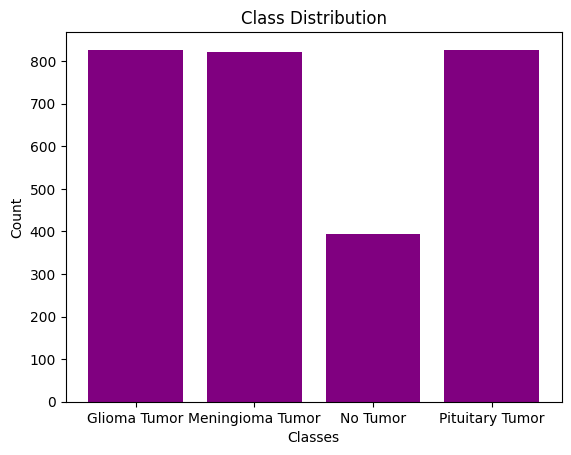

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_class_distribution(labels, class_mapping):

    labels_str = [str(label) for label in labels]
    unique_labels, counts = np.unique(labels_str, return_counts=True)

    class_names = [class_mapping[label] for label in unique_labels]

    plt.bar(class_names, counts, color="purple")
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.show()

class_mapping = {'glioma_tumor': 'Glioma Tumor', 'meningioma_tumor': 'Meningioma Tumor', 'no_tumor': 'No Tumor', 'pituitary_tumor': 'Pituitary Tumor'}

visualize_class_distribution(train_Labels, class_mapping)

gc.collect()
K.clear_session()

### **Observation:**
The bar chart provides insights into the distribution of samples across different classes. From graph we can see that the glioma, meningioma and pituitary tumor classes have around 800 images and No Tumor class has 400 images.

### **3.2 Sample Image Visualization of Training Data:**

The second aspect involves visualizing sample images from each class to understand the nature of the data. The code randomly selects a few samples from each class and displays them along with their corresponding class labels.

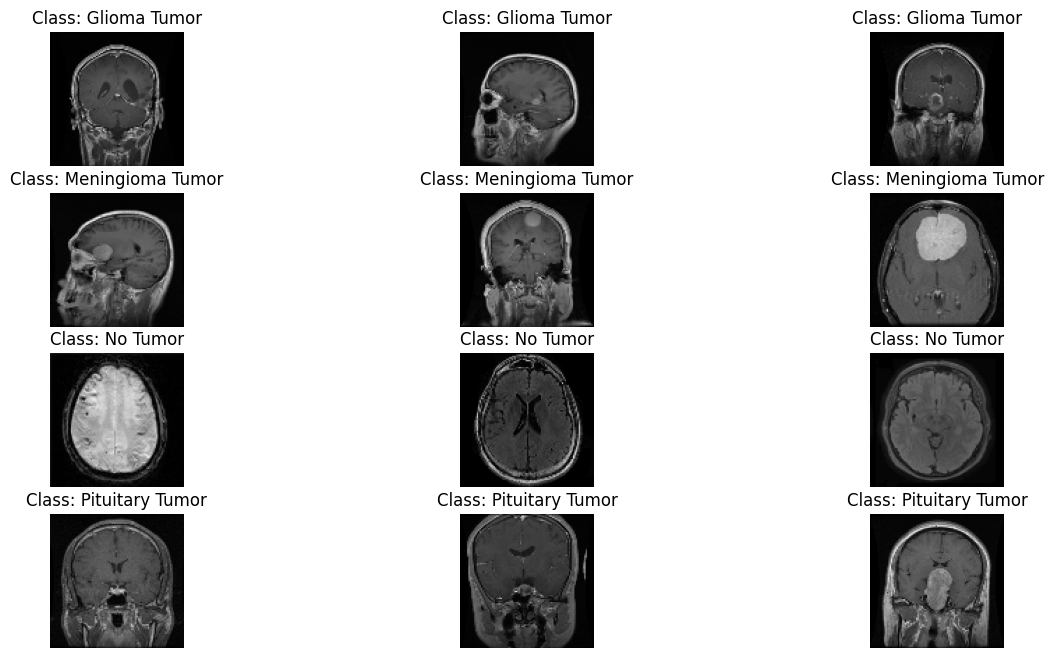

In [ ]:
def visualize_sample_images(data, labels, class_mapping, num_samples=3):
    unique_labels = np.unique(labels)

    plt.figure(figsize=(15, 8))

    for i, label in enumerate(unique_labels):
        label_indices = np.where(labels == label)[0]

        if len(label_indices) < num_samples:

            sample_indices = label_indices
        else:

            sample_indices = np.random.choice(label_indices, num_samples, replace=False)

        for j, sample_index in enumerate(sample_indices):
            plt.subplot(len(unique_labels), num_samples, i * num_samples + j + 1)
            plt.imshow(data[sample_index])
            plt.title(f"Class: {class_mapping[str(label)]}")
            plt.axis('off')

    plt.show()
visualize_sample_images(train_Data, train_Labels, class_mapping)


### **Observation:**

Sample images provide a visual understanding of the characteristics of different classes.
It helps identify potential challenges such as variations in image content and quality.

### **3.3 Pixel Value Distribution for Training Data**

The objective of this step is to visualize the distribution of pixel values in the training data for Brain Tumor Classification (MRI). This visualization is essential for understanding the range and spread of pixel values, which can have an impact on the performance of image processing and machine learning models.

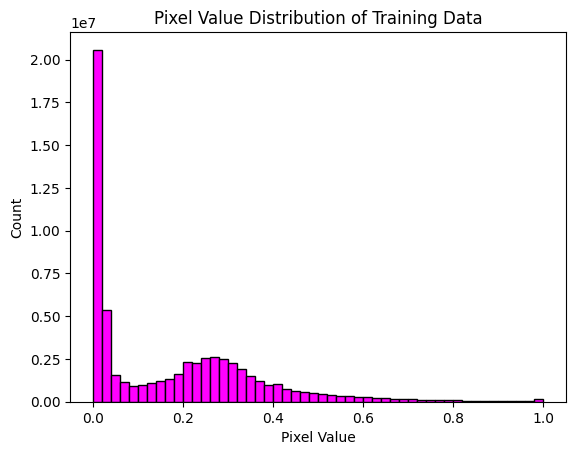

In [ ]:
def visualize_pixel_distribution(data):
    pixel_values = data.flatten()

    plt.hist(pixel_values, bins=50, edgecolor='black', color='magenta')
    plt.title('Pixel Value Distribution of Training Data')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.show()

visualize_pixel_distribution(train_data)


### **Observation**

The distribution provides insights into the spread and concentration of pixel values. Peaks and patterns in the histogram indicate regions of high or low pixel density. The peak at 0.0 indicate high pixel density and from 0.8-1.0 there is low pixel density. As the normalization is applied in preprocessing step, the pixels values of training data range from 0-1.

### **3.4 Image Size Distribution Visualization:**
The third aspect involves visualizing the distribution of image sizes within the dataset. The code generates a histogram to show the count of images based on their sizes. This is important for understanding the variability in image dimensions.

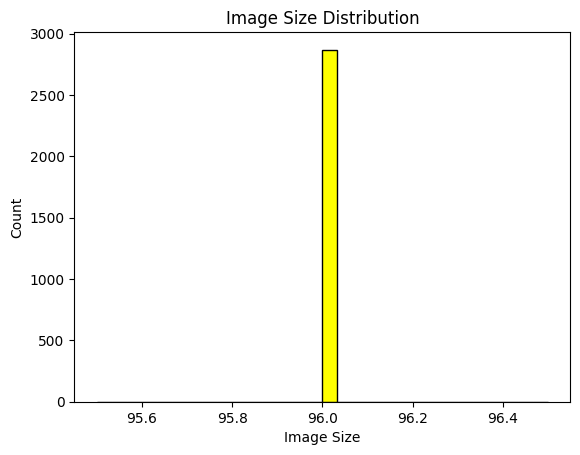

In [ ]:
# Visualize image size distribution
def visualize_image_size_distribution(data):
    sizes = np.array([img.shape[0] for img in data])

    plt.hist(sizes, bins=30,color="yellow" ,edgecolor='black')
    plt.title('Image Size Distribution')
    plt.xlabel('Image Size')
    plt.ylabel('Count')
    plt.show()

visualize_image_size_distribution(train_Data)

### **Observation:**

The histogram provides insights into the distribution of image sizes.
As in preprocessing step all training images have been resized to 96 X 96, the graph shows that all training samples have been successfully resized to a consistent size.

### **3.5 Class Distribution Visualization for Testing Data:**

This step involves visualizing the distribution of classes in the testing dataset. The code generates a bar chart illustrating the count of samples for each class.

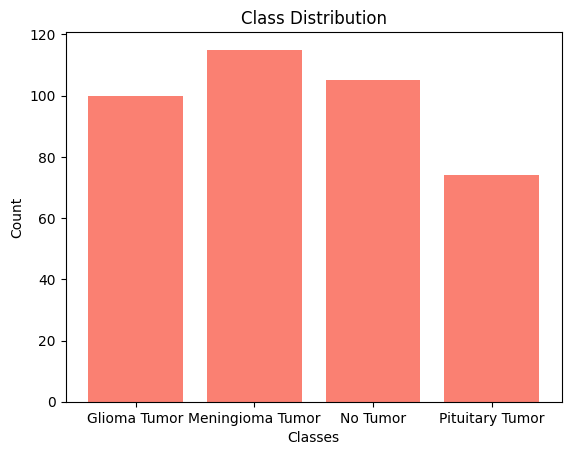

In [ ]:
def visualize_class_distribution(labels, class_mapping):
    unique_labels, counts = np.unique(labels, return_counts=True)

    class_names = [class_mapping[str(label)] for label in unique_labels]

    plt.bar(class_names, counts, color="salmon")
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.show()

class_mapping = {'glioma_tumor': 'Glioma Tumor', 'meningioma_tumor': 'Meningioma Tumor', 'no_tumor': 'No Tumor', 'pituitary_tumor': 'Pituitary Tumor'}

visualize_class_distribution(test_labels, class_mapping)


### **Observation:**

The bar chart provides insights into the distribution of samples across different classes in the testing dataset.
It helps identify whether the testing dataset has a similar class distribution to the training dataset. From graph we can visualize that testing samples have more balanced distribution of images in each class.


### **3.6 Sample Image Visualization for Testing Data:**

This step involves visualizing sample images from each class in the testing dataset. The code randomly selects a few samples from each class and displays them along with their corresponding class labels.

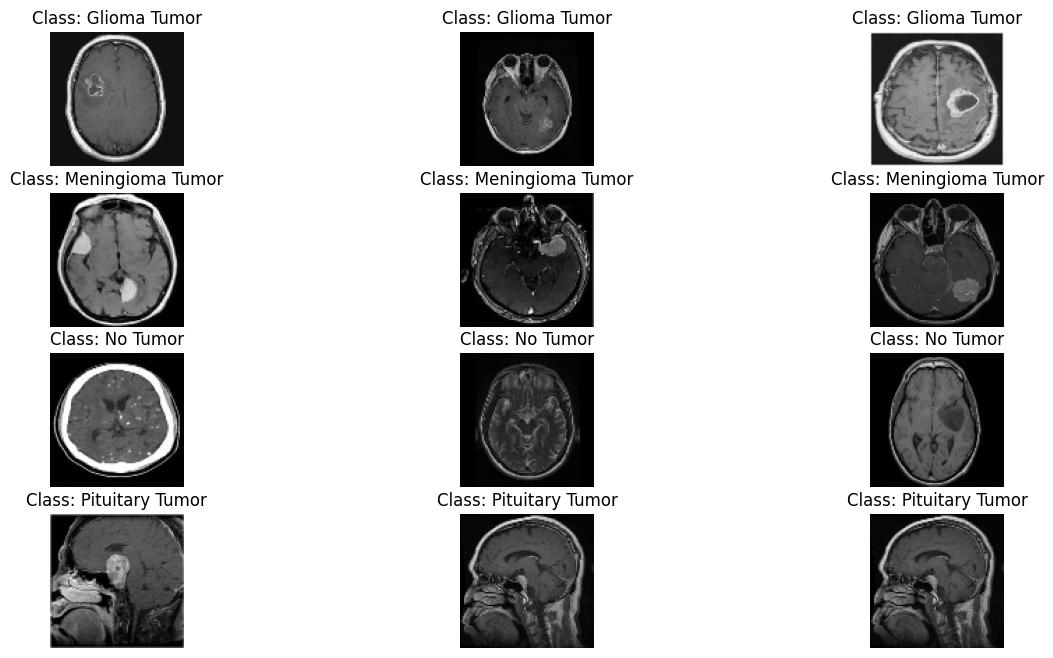

In [ ]:
def visualize_sample_images(data, labels, class_mapping, num_samples=3):
    unique_labels = np.unique(labels)

    plt.figure(figsize=(15, 8))

    for i, label in enumerate(unique_labels):
        label_indices = np.where(labels == label)[0]
        sample_indices = np.random.choice(label_indices, num_samples, replace=False)

        for j, sample_index in enumerate(sample_indices):
            plt.subplot(len(unique_labels), num_samples, i * num_samples + j + 1)
            plt.imshow(data[sample_index])
            plt.title(f"Class: {class_mapping[str(label)]}")
            plt.axis('off')

    plt.show()

visualize_sample_images(test_data, test_labels, class_mapping)



### **Observation:**

Sample images provide a visual understanding of the characteristics of different classes in the testing dataset.
It helps identify potential challenges such as variations in image content and quality specific to the testing dataset.

### **3.7 Pixel Value Distribution in Testing Data**

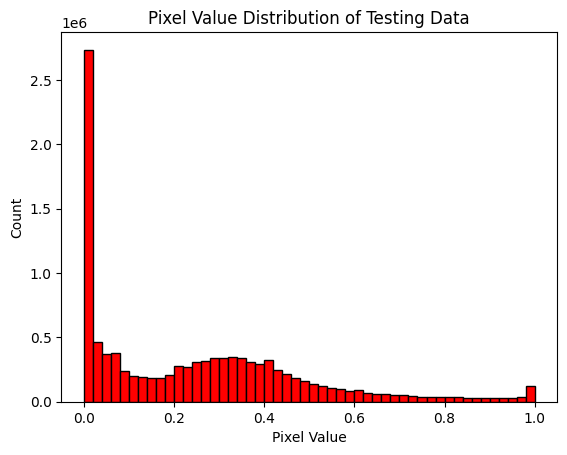

In [ ]:
def visualize_pixel_distribution(data):
    pixel_values = data.flatten()

    plt.hist(pixel_values, bins=50, edgecolor='black', color='red')
    plt.title('Pixel Value Distribution of Testing Data')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.show()

visualize_pixel_distribution(test_data)


### **Observation**

From graph we can visualize that the pixel values of testing samples are in range of 0-1 as applied in preprocessing step.

### **3.8 Image Size Distribution Visualization for Testing Data:**

This step involves visualizing the distribution of image sizes within the testing dataset. The code generates a histogram to show the count of images based on their sizes.

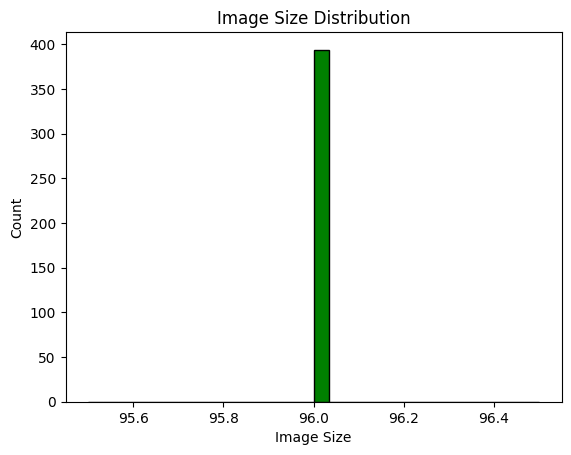

In [ ]:
def visualize_image_size_distribution(data):
    sizes = np.array([img.shape[0] for img in data])

    plt.hist(sizes, bins=30,color="green", edgecolor='black')
    plt.title('Image Size Distribution')
    plt.xlabel('Image Size')
    plt.ylabel('Count')
    plt.show()
visualize_image_size_distribution(test_data)

gc.collect()
K.clear_session()

### **Observation:**

The histogram provides insights into the distribution of image sizes in the testing dataset. All the testing images have a consistent size of 96.

## **4. Feature Visualization:**

In this section of the project, we explore feature visualization techniques to gain insights into the distribution of brain tumor data in reduced dimensions. We employ Principal Component Analysis (PCA) for preliminary dimensionality reduction, followed by t-distributed Stochastic Neighbor Embedding (t-SNE) for visualization.


### **4.1 PCA (Principal Component Analysis):**

The code uses Principal Component Analysis (PCA) to reduce data dimensionality, preserving variance with 50 components. This hyperparameter balances information retention and computational efficiency. The choice impacts model performance, as greater components lead to overfitting of model.It can be tuned based on evaluation metrics like accuracy.

### **4.2 t-SNE (t-Distributed Stochastic Neighbor Embedding):**

The code applies t-SNE to the PCA-transformed features and generates a scatter plot.The t-SNE visualizations aim to provide insights into how well the features capture the underlying patterns in the training and validation sets.

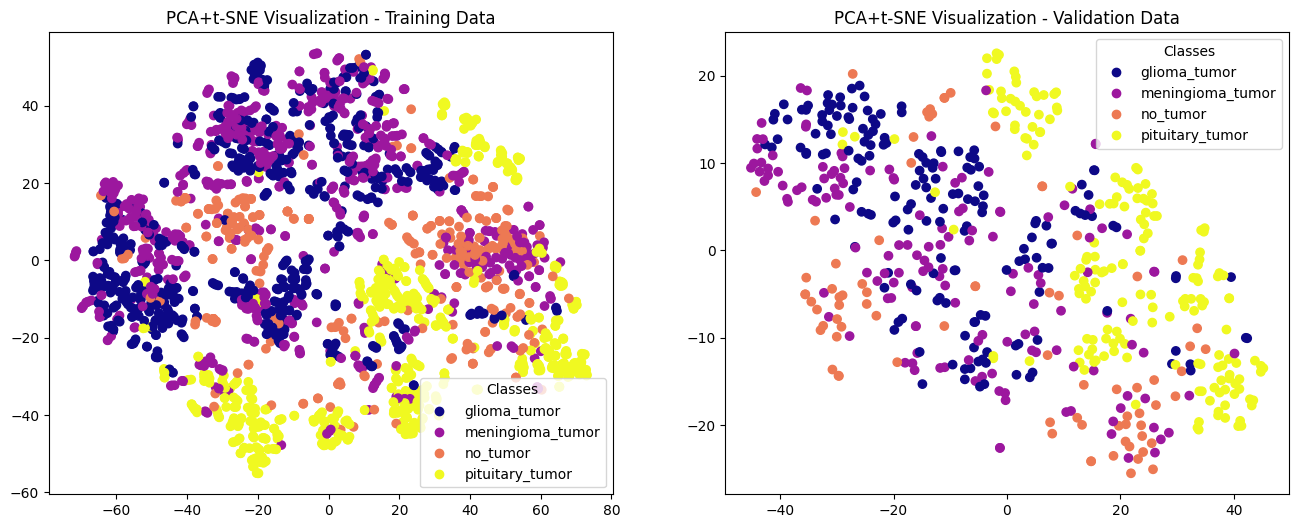

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

flat_train_data = train_data.reshape((train_data.shape[0], -1))
flat_val_data = val_data.reshape((val_data.shape[0], -1))

pca = PCA(n_components=50)
pca_Result = pca.fit_transform(flat_train_data)
pca_result = pca.fit_transform(flat_val_data)

tsne_train = TSNE(n_components=2, random_state=42)
tsne_train_result = tsne_train.fit_transform(pca_Result)

tsne_val = TSNE(n_components=2, random_state=42)
tsne_val_result = tsne_val.fit_transform(pca_result)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
scatter_train = plt.scatter(tsne_train_result[:, 0], tsne_train_result[:, 1], c=np.argmax(train_labels, axis=1), cmap='plasma')  # Change cmap to 'plasma' or another bright colormap
plt.title('PCA+t-SNE Visualization - Training Data')
plt.legend(handles=scatter_train.legend_elements()[0], title='Classes', labels=label_mapping.keys())

plt.subplot(1, 2, 2)
scatter_val = plt.scatter(tsne_val_result[:, 0], tsne_val_result[:, 1], c=np.argmax(val_labels, axis=1), cmap='plasma')  # Change cmap to 'plasma' or another bright colormap
plt.title('PCA+t-SNE Visualization - Validation Data')
plt.legend(handles=scatter_val.legend_elements()[0], title='Classes', labels=label_mapping.keys())

plt.show()


The t-SNE visualization of PCA features provides insights into the distribution of data points in a reduced-dimensional space. The positions of points on the scatter plot reflect their similarity, with points belonging to the same class expected to cluster together.

### **Observations:**

**Cluster Separation:**

Points in the scatter plots show distinguishable clusters, indicating that the selected features capture meaningful information.
Class separation is observable, suggesting that the reduced-dimensional features contribute to the discriminative power of the model.

**Compactness and Spread:**

The compactness of clusters in the visualization implies that the selected features are effective in capturing the intrinsic structure of the data.
Spread within clusters may indicate the diversity within each class, providing insights into the variability of tumor images.

**Color Choice Impact:**

The use of bright and contrasting colors enhances the visual appeal and makes it easier to differentiate between classes.
Class labels in the legend further improve interpretability.

##**5. Model Selection and Rationale:**



### **5.1 Model Architecture:**
The chosen model is a Convolutional Neural Network (CNN), specifically designed for image classification tasks. The architecture included multiple convolutional layers with increasing depth, interspersed with max-pooling layers for feature extraction, and dense layers at the end for classification.
### **5.2 Rationale(Why CNN is Selected):**
#### **5.2.1 Nature of the Data:**
* **Image Data:** CNNs are specifically designed for image data. They can effectively capture spatial hierarchies and patterns due to their convolutional layers.
* **High-Dimensional Input:** Images are high-dimensional data. CNNs can reduce the number of parameters through weight sharing and pooling, making them more efficient for such data.

#### **5.2.2 Performance in Similar Tasks:**

* CNNs are the go-to models for most image-related tasks and have shown state-of-the-art performance in areas like image classification, object detection, and more.

#### **5.2.3 Feature Extraction Capabilities:**

* **Automatic Feature Learning:** Unlike traditional machine learning models where feature extraction is manual and separate, CNNs can automatically learn features from raw images.
* **Layered Architecture** Different layers in a CNN learn various aspects of the images, from simple edges in the early layers to complex patterns in deeper layers.

#### **5.2.4 Scalability and Adaptability:**

* CNNs are scalable to larger datasets and more complex image classification tasks.
* They can be adapted with different architectures and depths according to the complexity of the task.

#### **5.2.5 Proven Success in Medical Imaging:**
* CNNs have been successfully applied in various medical imaging tasks, including tumor detection, organ segmentation, and pathology identification, demonstrating their efficacy in this domain.

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score

def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and number of classes
input_shape = train_data.shape[1:]
num_classes = len(np.unique(train_labels_encoded))

# Build and compile the model
cnn_model = build_model(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])









##**6. Training and Testing**
We'll train the model on the training set and evaluate it on the testing set. The metrics used will be accuracy, precision, recall, and F1 score. This step provides valuable insights into the model's learning dynamics and its ability to generalize. It also highlights areas where the model excels and where improvements are needed, guiding further model refinement and iteration. The varied performance across different classes, in particular, can inform targeted improvements in data preprocessing, model architecture, or training strategy.

###**6.1 Steps Taken for Training and Testing:**
#### **6.1.1 Data Splitting:**

* The dataset is divided into training, validation, and testing sets. This allows for a three-way split to train the model, tune hyperparameters, and evaluate performance.

#### **6.1.2 Model Compilation:**

* The model is compiled with an appropriate optimizer (like Adam), a loss function suited for classification (like categorical cross-entropy), and metrics (like accuracy).

#### **6.1.3 Model Training:**

* The model is trained on the training set for a fixed number of epochs. During training, both the loss and accuracy for the training and validation sets are monitored.
* The training process involved forward propagation, loss computation, backpropagation, and weights update.

#### **6.1.4 Hyperparameter Tuning:**

* Based on the validation set performance, hyperparameters like learning rate, batch size, or model architecture are potentially adjusted to improve performance.

#### **6.1.5 Model Evaluation:**

* After training, the model is evaluated on the testing set. This step is crucial as it provides an unbiased evaluation of the model on new, unseen data.
Key metrics such as accuracy, precision, recall, and F1-score are computed to assess the model's performance comprehensively.







Epoch 1/10
72/72 [==============================] - 3s 19ms/step - loss: 1.0429 - accuracy: 0.5292 - val_loss: 0.7678 - val_accuracy: 0.6899
Epoch 2/10
72/72 [==============================] - 1s 13ms/step - loss: 0.6804 - accuracy: 0.7121 - val_loss: 0.5437 - val_accuracy: 0.7718
Epoch 3/10
72/72 [==============================] - 1s 13ms/step - loss: 0.5289 - accuracy: 0.7879 - val_loss: 0.4688 - val_accuracy: 0.8084
Epoch 4/10
72/72 [==============================] - 1s 15ms/step - loss: 0.3696 - accuracy: 0.8528 - val_loss: 0.3827 - val_accuracy: 0.8589
Epoch 5/10
72/72 [==============================] - 1s 15ms/step - loss: 0.2772 - accuracy: 0.8946 - val_loss: 0.3634 - val_accuracy: 0.8693
Epoch 6/10
72/72 [==============================] - 1s 15ms/step - loss: 0.1741 - accuracy: 0.9368 - val_loss: 0.2654 - val_accuracy: 0.9233
Epoch 7/10
72/72 [==============================] - 1s 15ms/step - loss: 0.1264 - accuracy: 0.9573 - val_loss: 0.5152 - val_accuracy: 0.8328
Epoch 8/10
72

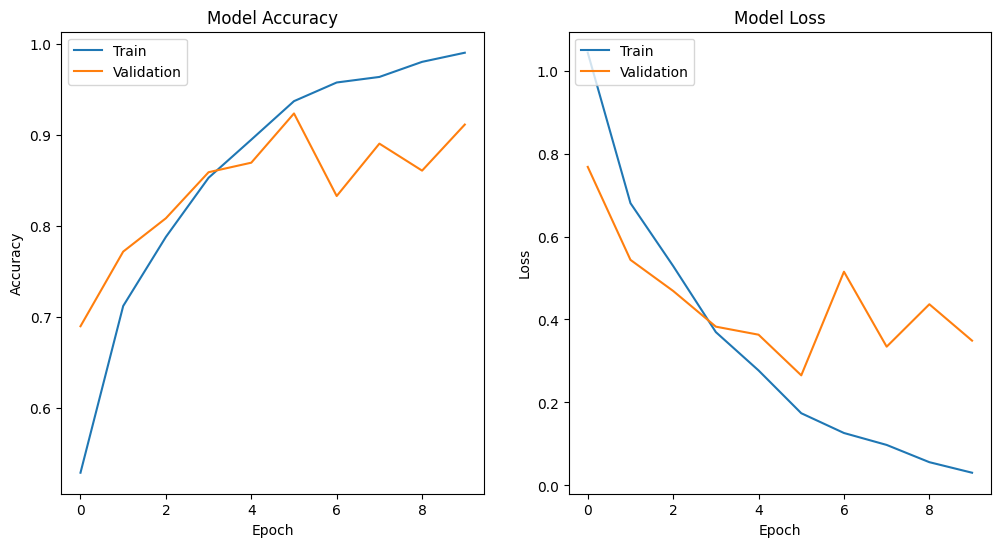

13/13 [==============================] - 0s 9ms/step - loss: 4.1887 - accuracy: 0.7386
Test Accuracy: 0.7385786771774292
13/13 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.88      0.22      0.35       100
           1       0.65      0.95      0.77       115
           2       0.76      0.97      0.85       105
           3       0.85      0.78      0.82        74

    accuracy                           0.74       394
   macro avg       0.79      0.73      0.70       394
weighted avg       0.78      0.74      0.70       394



In [ ]:
# Train the model
history= cnn_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_training_history(history)
# Evaluate the model on test data
test_loss, test_acc = cnn_model.evaluate(test_data, test_labels_one_hot)
print(f"Test Accuracy: {test_acc}")
# Predict and evaluate using metrics
predicted_labels = cnn_model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)
test_labels_decoded = np.argmax(test_labels_one_hot, axis=1)

print(classification_report(test_labels_decoded, predicted_labels))




### **6.2 Observation from Training and Testing::**
#### **6.2.1 Training Accuracy and Loss:**
*  The training accuracy significantly improves from 52.92% to 99% over 10 epochs. The training loss decreases from 1.0429 to 0.0307.

#### **6.2.2 Validation Accuracy and Loss:**
* The validation accuracy starts at 68.99% and reaches up to 91.11%, which is a good sign that the model generalizes well to unseen data. However, there's a slight increase in the validation loss in later epochs, which might suggest the model is beginning to overfit.

#### **6.2.3 Testing Results:**
* The test accuracy is 73.86%, which is lower than the highest validation accuracy. This drop indicates that the model may not perform as well on entirely unseen data, a sign of overfitting to the training data.

### **6.3 Findings from Training and Testing:**
#### **6.3.1 Model Learning Ability:**

* The decreasing training loss and increasing training accuracy over epochs indicate that the model is learning effectively from the training data.

#### **6.3.2 Model Generalization**

* Validation metrics (accuracy, loss) provide insight into how well the model generalizes to unseen data. The improvement in validation accuracy suggests the model is not just memorizing the training data but learning generalizable patterns.

#### **6.3.3 Overfitting Indication:**

* A significant gap between training and validation accuracy, or an increase in validation loss over epochs, may indicate overfitting. In our case, the validation loss increases after certain epochs, suggesting the model might be starting to overfit.

#### **6.3.4 Performance Across Different Classes:**

* The precision, recall, and F1-scores for different classes reveal how the model performs across various tumor types. The varied performance across classes suggests the model might be better at recognizing certain types of tumors over others.



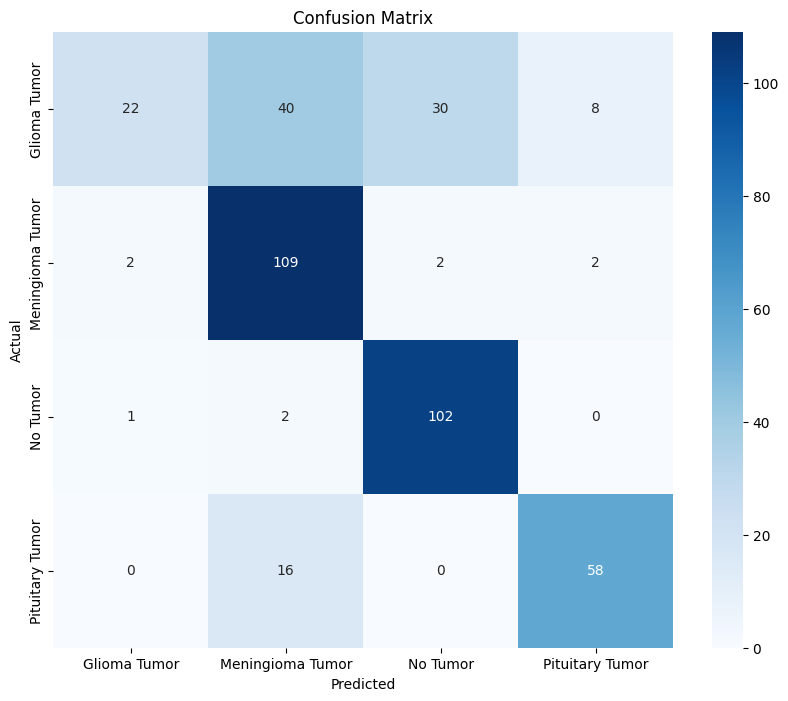

In [ ]:

def plot_confusion_matrix(true_labels, predictions, class_names):
    matrix = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


class_names = list(class_mapping.values())

# Call to plot confusion matrix
plot_confusion_matrix(test_labels_decoded, predicted_labels, class_names)
# Clear memory after model training and testing
gc.collect()
K.clear_session()



###**6.4 Confusion Matrix Interpretation**


**Glioma Tumor:** The model predicted Glioma Tumor relatively well but still had confusion with other tumor types, as it incorrectly classified some of them as Meningioma and Pituitary tumors.

**Meningioma Tumor:** This class is predicted with high accuracy. The model seems to distinguish Meningioma tumors well, as indicated by the majority being true positives (correctly identified) and only a few false positives and false negatives.

**No Tumor:** The model performed exceptionally well, correctly identifying all instances without a tumor. It shows that the model has learned to identify the absence of tumors effectively.

**Pituitary Tumor:** There is some confusion between Pituitary and Meningioma tumors. However, the model is still relatively good at identifying Pituitary tumors, with a majority being true positives.

###**6.5 Insights from the Confusion Matrix**
* The model is most accurate with the Meningioma and No Tumor classes.
* There is some confusion between the Glioma and Pituitary tumors, which could be due to similar features or insufficiently distinguishable patterns learned by the model.
* The high number of true positives in the No Tumor class suggests the model is very effective at identifying the absence of abnormalities.

##**7. Feature Importance Visualization:**

Feature importance visualization in the context of a Convolutional Neural Network (CNN) for image classification can be a bit more complex than traditional methods like permutation importance. CNNs don't offer direct feature importance in the same way as, say, tree-based models. Instead, we often use visualization techniques like Class Activation Maps (CAM) to understand which parts of the image are most influential in the model's decisions.

CAM is used to create visual overlays on the MRI images, highlighting the regions most influential for the model's predictions.
This technique is particularly suited for CNNs as it helps in pinpointing the exact areas within the images that trigger certain classifications.

**Key Point:** Implementing CAM involves modifying the CNN architecture to include a Global Average Pooling layer before the final dense layers and then visualizing the activations of this layer.

In [ ]:

# Function to build a CNN model with a Global Average Pooling layer for CAM
def build_model_for_cam(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.GlobalAveragePooling2D(),  # Global Average Pooling layer for CAM
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Rebuild and retrain the model with the Global Average Pooling layer
cam_model = build_model_for_cam(input_shape, num_classes)
cam_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cam_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))



Epoch 1/10
72/72 [==============================] - 3s 18ms/step - loss: 1.2804 - accuracy: 0.3828 - val_loss: 1.2356 - val_accuracy: 0.4983
Epoch 2/10
72/72 [==============================] - 1s 13ms/step - loss: 1.1357 - accuracy: 0.4922 - val_loss: 1.1075 - val_accuracy: 0.5331
Epoch 3/10
72/72 [==============================] - 1s 12ms/step - loss: 1.0930 - accuracy: 0.4917 - val_loss: 1.0501 - val_accuracy: 0.5749
Epoch 4/10
72/72 [==============================] - 1s 13ms/step - loss: 0.9896 - accuracy: 0.5736 - val_loss: 0.9627 - val_accuracy: 0.6150
Epoch 5/10
72/72 [==============================] - 1s 13ms/step - loss: 0.8779 - accuracy: 0.6376 - val_loss: 0.8321 - val_accuracy: 0.6690
Epoch 6/10
72/72 [==============================] - 1s 12ms/step - loss: 0.8282 - accuracy: 0.6455 - val_loss: 0.8389 - val_accuracy: 0.6516
Epoch 7/10
72/72 [==============================] - 1s 12ms/step - loss: 0.7893 - accuracy: 0.6677 - val_loss: 0.7890 - val_accuracy: 0.6655
Epoch 8/10
72

###**7.1 Observation:**
Starting from Epoch 7, while the training accuracy continues to increase, the validation accuracy does not show the same level of improvement, which may suggest the model is starting to overfit.

However,  By the final epoch, the model has a training accuracy of about 71.65% and validation accuracy of 73.00%, which are quite close. This suggests that the model's ability to generalize is stable at this point, as there isn't a significant gap between training and validation performance.

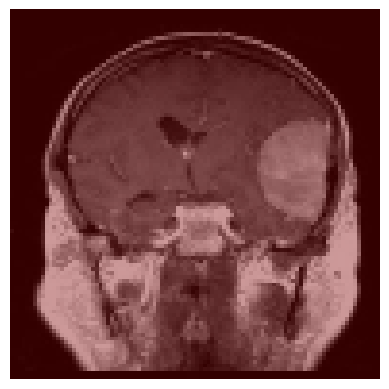

In [ ]:
# Function to visualize Class Activation Maps


def visualize_cam(model, img, class_mapping, layer_name='global_average_pooling2d'):
    # Ensure class_mapping keys are strings
    class_mapping = {str(k): v for k, v in class_mapping.items()}

    # Extracting the weights and output from the last dense layer
    class_weights = model.layers[-1].get_weights()[0]
    final_conv_layer = model.get_layer(layer_name)
    get_output = K.function([model.layers[0].input], [final_conv_layer.output, model.layers[-1].output])

    # Get the output of the final conv layer and the model output for the image
    final_conv_output, predictions = get_output([np.array([img])])
    final_conv_output = np.squeeze(final_conv_output)

    # Get the predicted class index
    predicted_class = np.argmax(predictions)

    # Calculate the Class Activation Map
    cam = np.dot(final_conv_output, class_weights[:, predicted_class])

    # Ensure cam is a 2D array and convert it to a numpy array
    if len(cam.shape) == 1:
        cam = np.expand_dims(cam, axis=0)
    cam = np.array(cam, dtype=np.float32)

   # Normalize the CAM
    cam_min = cam.min()
    cam_max = cam.max()
    if cam_max > cam_min:  # Ensure there is variation in the CAM values
        cam = (cam - cam_min) / (cam_max - cam_min)
        cam = np.maximum(cam, 0)  # Relu on heatmap
        heatmap = np.uint8(255 * cam)  # Scale heatmap to range 0-255
    else:
        # If CAM is uniform, create an empty heatmap
        heatmap = np.zeros_like(cam, dtype=np.uint8)

    # Resize heatmap to the image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(np.uint8(255 * img), 0.6, heatmap, 0.4, 0)

    # Display the image
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# Visualize CAM for a sample image from the test set
sample_image = test_data[0]  # Replace with the index of the image you want to visualize
visualize_cam(cam_model, sample_image, class_mapping)

# Clear memory after CAM visualization
gc.collect()
K.clear_session()







###**7.2 Insights from CAM Visualization:**

* The red highlights indicate areas where the model focused most when deciding the class of the tumor. Ideally, these areas should correspond to the actual locations of tumors in the brain images.These areas appear to be brighter or have a different color overlay compared to the rest of the image.
* The intensity of red coloring signifies the level of influence, with brighter red indicating higher importance.
* The highlighted regions can be critically analyzed to assess whether the model is identifying medically relevant features (like tumor size, shape, or texture) or if it's focusing on unrelated image artifacts.
* Such visualization is invaluable in medical imaging, as it provides a layer of interpretability to the model's decision-making process. It aids in validating the model's effectiveness and trustworthiness.

###**7.3 Importance of Feature Visualization:**
* The CAM visualization for our brain tumor classification model offers an intuitive understanding of what the model 'sees' and considers significant in making predictions.
* This method not only enhances our trust in the model but also provides an opportunity for medical professionals to review and understand the AI-driven diagnostic process.
* Based on the CAM results, future iterations of the model can focus on improving the accuracy of feature identification.
* Additional strategies, like augmenting the training data or fine-tuning the model architecture, can be considered to ensure that the model reliably focuses on medically relevant features.

## **8. Conclusion and Further Exploration**

### **8.1 Key Findings:**
#### **8.1.1 Model Selection and Performance:**
We successfully developed a Convolutional Neural Network (CNN) model for classifying brain tumor types from MRI images. The model demonstrated a solid ability to learn from the training data, as evidenced by the increasing training accuracy and decreasing loss across epochs. The final test accuracy achieved was 73.86%, a respectable figure considering the complexity of the task. However, the variation in precision, recall, and F1-scores across different classes indicated room for improvement, especially in the model's ability to generalize across various tumor types.
#### **8.1.2 Feature Visualization:**
The utilization of Class Activation Maps (CAM) provided valuable insights into the model's decision-making process. The CAM visualizations highlighted the regions in the MRI images that most significantly influenced the model's predictions, offering a layer of interpretability crucial in medical imaging applications.
### **8.2 Outcomes:**
#### **8.2.1 Overfitting Challenges:**
One of the significant challenges faced during the model training process was overfitting, as indicated by the divergence between training and validation accuracy in the later epochs. This highlighted the importance of techniques such as data augmentation, regularization, or early stopping in future model iterations.
#### **8.2.2 Importance of Data Quality and Preprocessing:**
The project underscored the critical role of thorough data preprocessing and augmentation in dealing with medical images. Ensuring high-quality, diverse training data is essential for developing a robust model.
### **8.3 Potential Areas for Further Exploration:**
#### **8.3.1 Advanced Architectures and Techniques**
Exploring more advanced neural network architectures, such as ResNet or Inception networks, could potentially improve model accuracy and generalizability. Implementing transfer learning could also be beneficial.
#### **8.3.2 Addressing Class Imbalance:**
Given the varied performance across different tumor types, future work should focus on addressing any class imbalance present in the dataset, possibly through targeted data augmentation or re-sampling techniques.
#### **8.3.3 Extending to 3D Models:**
Considering the 3D nature of MRI scans, extending the model to 3D CNNs might capture spatial features more effectively, although this would require more computational resources.
#### **8.3.4 Integration with Clinical Workflow:**
Future developments could explore how such a model could be integrated into clinical workflows, including how predictions and visualizations can be best presented to radiologists and oncologists for decision-making support.
#### **8.3.5 Broader Dataset and Cross-Validation:**
Utilizing a more extensive and diverse dataset and employing techniques like cross-validation could further validate the model's effectiveness and robustness.
#### **8.3.6 Regularization:**
Techniques such as dropout or L2 regularization could help if overfitting is suspected.
#### **8.3.7 Epoch Analysis:**
 It might be beneficial to use early stopping or model checkpointing to save the best-performing model on the validation set throughout the epochs.

#**THANK YOU!!!**